- Monte Carlo Option Pricing
- Normal Distribution

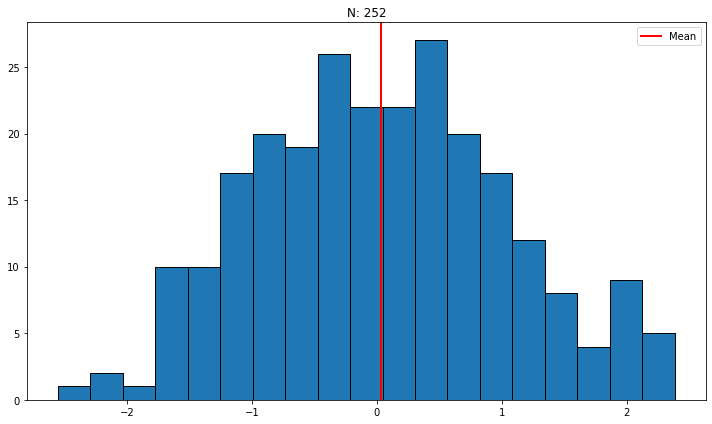

In [173]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt 

def plt_hist(n_i, seed_i):

    # Seed:
    np.random.seed(seed_i)

    # Generating array:
    k = random.randn(n_i)

    # Optimal bin size ( Sturge's Rule):
    o_bin = 1 + 3.322*log(n_i)
    o_bin = int(o_bin)

    # Figure:
    plt.figure(figsize=(10, 6))
    plt.hist(k, bins=o_bin, edgecolor='black')
    title_i = ('N: {}'.format(n_i))
    plt.title(str(title_i))
    mean = k.mean()
    plt.axvline(mean, color='r', label='Mean', linewidth=2)
    plt.legend()
    plt.tight_layout()
    plt.show()

plt_hist(n_i=252, seed_i=0)

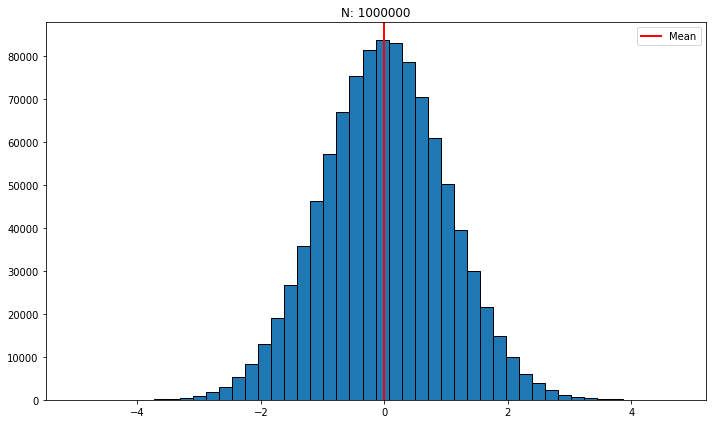

In [174]:
# N:1000000
plt_hist(n_i=1000000, seed_i=0)

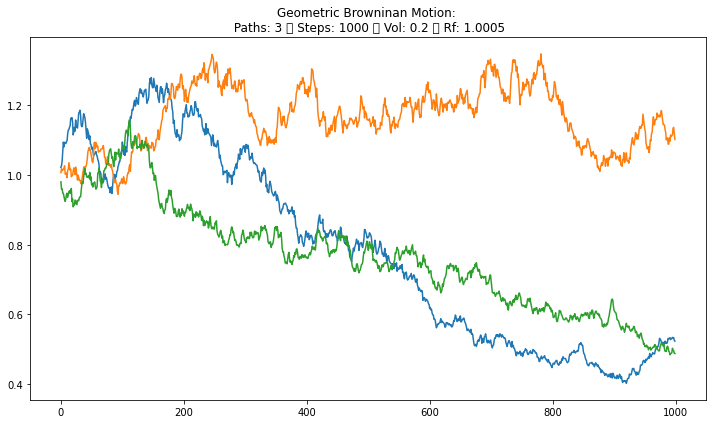

In [175]:
# Generating paths:

def plt_path_gen(paths_i, steps_i, vol_i, rf_i, seed_i):
    
    # Seed:
    np.random.seed(seed_i)
    
    # Figure:
    plt.figure(figsize=(10, 6))

    paths = list(range(paths_i))

    for p in paths:
        # Generating random numbers:
        s = random.randn(steps_i)

        # Scalling Volatility:
        vol = vol_i/sqrt(252)

        # Daily Risk Free rate:
        rf = 1 + rf_i

        # Generating a Geometric Brownian Motion:
        k = cumprod(1 + s*vol*rf)

        plt.plot(k)
    
    title_i = 'Geometric Browninan Motion: \n Paths: {} \t Steps: {} \t Vol: {} \t Rf: {}'.format(paths_i, steps_i, vol_i, rf)
    plt.title(title_i)
    plt.tight_layout()
    plt.show()

plt_path_gen(paths_i=3, steps_i=1000, vol_i=0.20, rf_i=0.0005, seed_i=0)

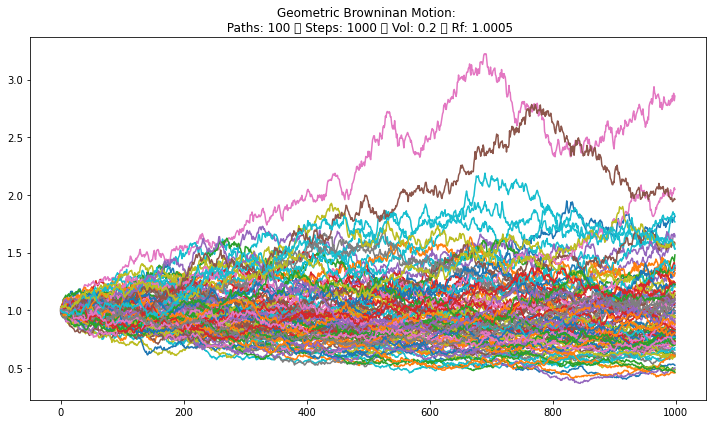

In [176]:
# Monte Carlo:
plt_path_gen(paths_i=100, steps_i=1000, vol_i=0.20, rf_i=0.0005, seed_i=0)

In [177]:
# Option Pricing:
# Call Option:

def monte_call(strike_price_i, start_px_i, paths_i, steps_i, vol_i, rf_i, seed_i):
    
    # Seed:
    np.random.seed(seed_i)
    last_px = []

    paths = list(range(paths_i))

    for p in paths:
        # Generating random numbers:
        s = random.randn(steps_i)

        # Scalling Volatility:
        vol = vol_i/sqrt(252)

        # Daily Risk Free rate:
        rf = 1 + rf_i

        # Generating a Geometric Brownian Motion:
        k = cumprod(1 + s*vol*rf)*start_px_i

        # Fetching last price:
        last_px_i = k[-1]
        last_px.append(last_px_i)
     
    # Call option payoff:
    px_payoff = []
     
    for px in last_px:
        payoff = px - strike_price_i
    
        if payoff < 0:
             px_payoff.append(0)

        else:
             px_payoff.append(payoff)
    
    px_payoff = np.array(px_payoff)
    px_option = px_payoff.mean()

    return (px_option, last_px)

In [180]:
px_call = monte_call(strike_price_i=100, start_px_i=100, paths_i=500000, steps_i=252, vol_i=0.2, rf_i=0, seed_i=0)
px_call_option = px_call[0]
print('\n Call Option (theoretical price): {}'.format(px_call_option))


 Call Option (theoretical price): 7.989479967606986


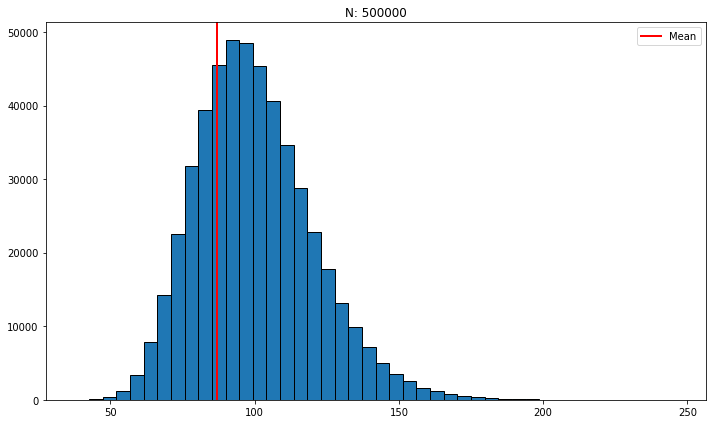

In [186]:
# Distribution of Last Price:

last_px = px_call[1]

plt.figure(figsize=(10, 6))
o_bin = 1 + 3.322*log(500000)
o_bin = int(o_bin)
plt.hist(last_px, bins=o_bin, edgecolor='black')
title_i = ('N: {}'.format(500000))
plt.title(str(title_i))
mean = k.mean()
plt.axvline(mean, color='r', label='Mean', linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()